#Import Library

In [ ]:
import tensorflow as tf

In [ ]:

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random
from glob import glob
import matplotlib.image as img
import zipfile
from tensorflow.keras.callbacks import EarlyStopping

#Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import tensorflow as tf
print(tf.__version__)

2.14.0


#Check our Dataset

In [ ]:

path = '/content/drive/MyDrive/ML Kelompok/MangoFruitDDS/SenMangoFruitDDS_bgremoved'

In [ ]:
counter = 0
dir_names=['alternaria', 'anthracnose', 'black_mould_rot', 'stem_and_rot']
for file in (dir_names):
    dir = os.listdir(f"{path}/{file}")

    print(f"Data for {file} is {len(dir)}")

Data for alternaria is 165
Data for anthracnose is 129
Data for black_mould_rot is 182
Data for stem_and_rot is 157
Data for alternaria is 165
Data for anthracnose is 129
Data for black_mould_rot is 182
Data for stem_and_rot is 157


# Split Dataset Into Training and Validation

In [ ]:
training_main='/content/drive/MyDrive/ML Kelompok/MangoFruitDDS/SenMangoFruitDDS_bgremoved'

In [ ]:
batch_size=64
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  training_main,
  shuffle=True,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(150, 150),
  batch_size=batch_size)

Found 838 files belonging to 5 classes.
Using 671 files for training.
Found 838 files belonging to 5 classes.
Using 671 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  training_main,
  shuffle=True,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(150,150),
  batch_size=batch_size)

Found 838 files belonging to 5 classes.
Using 167 files for validation.
Found 838 files belonging to 5 classes.
Using 167 files for validation.


In [ ]:
validation_size = int(0.5 * val_ds.cardinality().numpy())
test_ds = val_ds.take(validation_size)
val_ds = val_ds.skip(validation_size)

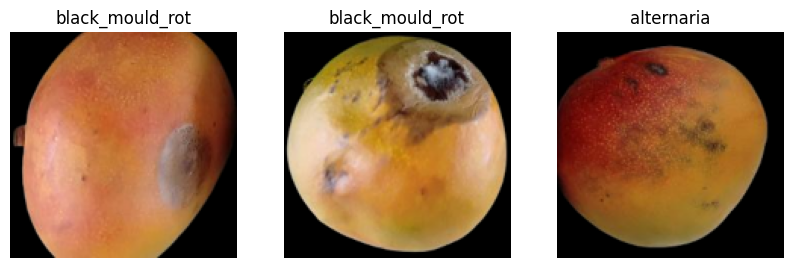

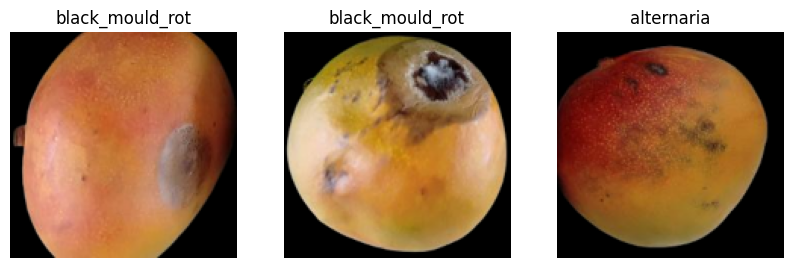

In [ ]:

plt.figure(figsize=(10, 10))
for image, label in train_ds.take(1):
    for i in range (3):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(dir_names[label[i]])
        plt.axis("off")

# Parameter

In [ ]:
IMG_SIZE = (150,150)
IMG_SHAPE = IMG_SIZE + (3,)

# Architecture using Transfer Learning (EfficientNetB1)

In [ ]:

from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Adamax
base_model=tf.keras.applications.EfficientNetB1(include_top=False, weights="imagenet",input_shape=IMG_SHAPE, pooling='max')
x = base_model.output
x = tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(128, kernel_regularizer = regularizers.l2(l = 0.070),activity_regularizer=regularizers.l1(0.008),
                bias_regularizer=regularizers.l1(0.008), activation='relu')(x)
x = Dropout(rate=0.3, seed=123)(x)
output = Dense(5, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

In [ ]:

learning_rate = 0.001

model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adamax(learning_rate=learning_rate),
                  metrics=['accuracy'])

In [ ]:
initial_epochs = 10
history = model.fit(train_ds, validation_data=val_ds, epochs=initial_epochs)

Epoch 1/10
11/11 [==============================] - 55s 929ms/step - loss: 16.8274 - accuracy: 0.5857 - val_loss: 17.1289 - val_accuracy: 0.5243
Epoch 2/10
11/11 [==============================] - 6s 401ms/step - loss: 13.7800 - accuracy: 0.9046 - val_loss: 14.0111 - val_accuracy: 0.6602
Epoch 3/10
11/11 [==============================] - 6s 481ms/step - loss: 11.7569 - accuracy: 0.9344 - val_loss: 11.7665 - val_accuracy: 0.7087
Epoch 4/10
11/11 [==============================] - 6s 408ms/step - loss: 10.0168 - accuracy: 0.9732 - val_loss: 10.1589 - val_accuracy: 0.7184
Epoch 5/10
11/11 [==============================] - 6s 409ms/step - loss: 8.5771 - accuracy: 0.9836 - val_loss: 8.7430 - val_accuracy: 0.7087
Epoch 6/10
11/11 [==============================] - 6s 473ms/step - loss: 7.3853 - accuracy: 0.9821 - val_loss: 7.4262 - val_accuracy: 0.7670
Epoch 7/10
11/11 [==============================] - 6s 393ms/step - loss: 6.3457 - accuracy: 0.9940 - val_loss: 6.3739 - val_accuracy: 0.80

Text(0.5, 1.0, 'Training vs Validation Loss')

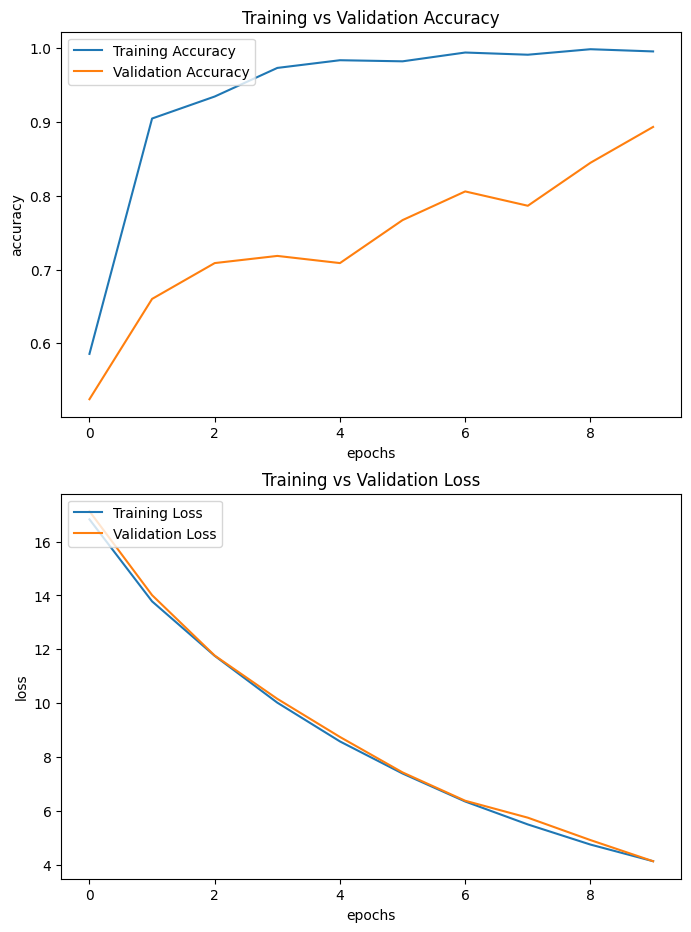

In [ ]:

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 11))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.title('Training vs Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.title('Training vs Validation Loss')

In [ ]:

model.evaluate(test_ds)

1/1 [==============================] - 1s 757ms/step - loss: 4.2284 - accuracy: 0.8750


[4.228357791900635, 0.875]